In [1]:
#We will load all the functions / commands that will be required to do a 
#Differential Gene expression analysis of our samples. 
#These functions come as a part of R packages that we load using the library() function.
#The three packages are edgeR,gplots and statmod.

In [2]:
library(edgeR)

Loading required package: limma


In [3]:
library(gplots)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [4]:
library(statmod)

In [5]:
#Next, let's read the merged count matrix of gene read counts for eight of our samples, as previously generated. 
#The file will be read in the form of a table. Remember this file has a header row which should be treated 
#as a meta-data.

In [6]:
Count <- read.table("genecount_matrix_merged.txt", sep="\t", header=TRUE)

In [7]:
#Let's check the first few rows of our table stored in the variable "Count".

In [8]:
head(Count)

GeneID,SRR1023811,SRR1023810,SRR1023805,SRR1023808,SRR1023812,SRR1023806,SRR1023809,SRR1023807
WP_003400253.1,7622,9073,13568,2722,7186,12854,9375,3076
WP_003400271.1,7178,7002,7771,2770,6249,9277,6180,3204
WP_003899768.1,2146,1512,2269,814,1815,2356,1706,828
WP_003899769.1,1093,863,1243,545,1001,1217,975,646
WP_003917863.1,18194,13442,15728,10218,16358,17922,13360,12004
WP_003400286.1,18083,13945,15304,9381,15890,17919,13146,10940


In [9]:
#WE have taken care of the header and successfully converted it into the metadata. We still need to take care
#of the first column, the gene IDs. Our actual data currently starts from second column. Let's extract that.

In [10]:
GeneWiseCounts <- Count[,-1] 

In [11]:
#The above command extracts a sub-matrix (all columns except the first) and stores it in GeneWiseCounts variable.

In [12]:
#Let's check the first few lines of the new matrix generated.
head(GeneWiseCounts)

SRR1023811,SRR1023810,SRR1023805,SRR1023808,SRR1023812,SRR1023806,SRR1023809,SRR1023807
7622,9073,13568,2722,7186,12854,9375,3076
7178,7002,7771,2770,6249,9277,6180,3204
2146,1512,2269,814,1815,2356,1706,828
1093,863,1243,545,1001,1217,975,646
18194,13442,15728,10218,16358,17922,13360,12004
18083,13945,15304,9381,15890,17919,13146,10940


In [13]:
#Let's assign the first column of the "Count" matrix as the meta-data for the matrix "GeneWiseCounts".

In [14]:
genenames <- Count[,1]
head(genenames)

[1] WP_003400253.1 WP_003400271.1 WP_003899768.1 WP_003899769.1 WP_003917863.1
[6] WP_003400286.1
4058 Levels: WP_003399735.1 WP_003399745.1 WP_003399771.1 ... WP_085974999.1

In [15]:
#Let's assign these gene IDs as row names to "GeneWiseCounts" matrix

In [16]:
rownames(GeneWiseCounts) <- make.names(genenames, unique=TRUE)

In [17]:
head(GeneWiseCounts)

,SRR1023811,SRR1023810,SRR1023805,SRR1023808,SRR1023812,SRR1023806,SRR1023809,SRR1023807
WP_003400253.1,7622,9073,13568,2722,7186,12854,9375,3076
WP_003400271.1,7178,7002,7771,2770,6249,9277,6180,3204
WP_003899768.1,2146,1512,2269,814,1815,2356,1706,828
WP_003899769.1,1093,863,1243,545,1001,1217,975,646
WP_003917863.1,18194,13442,15728,10218,16358,17922,13360,12004
WP_003400286.1,18083,13945,15304,9381,15890,17919,13146,10940


In [18]:
#Similarly, let's assign the SRR IDs as column names to the "GeneWiseCounts".

In [19]:
#Remember we have four conditions. Each condition has two biological replicates each.
#Four M. tuberculosis growth conditions are:
#1) Carbon source: Pyruvate; pH: 5.7
#2) Carbon source: Pyruvate; pH: 7.0
#3) Carbon source: Glycerol; pH: 5.7
#4) Carbon source: Glycerol; pH: 7.0

#Let's change the names of SRR IDs to something more meaningful and intuitive while assigning the column names.

In [20]:
colnames(GeneWiseCounts) <- paste(c(rep("pyruvate5.7",1), rep("pyruvate7",1), rep("glycerol7",1), rep("glycerol5.7",1),
                                    rep("pyruvate5.7",1), rep("glycerol7",1), rep("pyruvate7",1), rep("glycerol5.7",1)),
                                    c(1,1,1,1,2,2,2,2), sep = "_")

In [21]:
head(GeneWiseCounts)

,pyruvate5.7_1,pyruvate7_1,glycerol7_1,glycerol5.7_1,pyruvate5.7_2,glycerol7_2,pyruvate7_2,glycerol5.7_2
WP_003400253.1,7622,9073,13568,2722,7186,12854,9375,3076
WP_003400271.1,7178,7002,7771,2770,6249,9277,6180,3204
WP_003899768.1,2146,1512,2269,814,1815,2356,1706,828
WP_003899769.1,1093,863,1243,545,1001,1217,975,646
WP_003917863.1,18194,13442,15728,10218,16358,17922,13360,12004
WP_003400286.1,18083,13945,15304,9381,15890,17919,13146,10940


In [22]:
GeneWiseCounts<-GeneWiseCounts[,sort(names(GeneWiseCounts))] #sort columns according to conditions
head(GeneWiseCounts)

,glycerol5.7_1,glycerol5.7_2,glycerol7_1,glycerol7_2,pyruvate5.7_1,pyruvate5.7_2,pyruvate7_1,pyruvate7_2
WP_003400253.1,2722,3076,13568,12854,7622,7186,9073,9375
WP_003400271.1,2770,3204,7771,9277,7178,6249,7002,6180
WP_003899768.1,814,828,2269,2356,2146,1815,1512,1706
WP_003899769.1,545,646,1243,1217,1093,1001,863,975
WP_003917863.1,10218,12004,15728,17922,18194,16358,13442,13360
WP_003400286.1,9381,10940,15304,17919,18083,15890,13945,13146


In [23]:
#Now that we have sorted our columns on the basis of biological replicates per condition,
#let's make a variable "conditions" which is required as a parameter by the downstream function DGEList()
#of the edgeR package.

In [24]:
conditions <- c(rep("glycerol5.7", 2), rep("glycerol7", 2), rep("pyruvate5.7", 2), rep("pyruvate7",2))
conditions <- factor(conditions)

In [25]:
conditions

[1] glycerol5.7 glycerol5.7 glycerol7   glycerol7   pyruvate5.7 pyruvate5.7
[7] pyruvate7   pyruvate7  
Levels: glycerol5.7 glycerol7 pyruvate5.7 pyruvate7

In [26]:
#Let's check the dimensions of our final matrix "GeneWiseCounts". 
dim(GeneWiseCounts)

[1] 4058    8

In [27]:
#It is now ready to be fed into the functions of the package edgeR() which we had loaded at the beginning.
#We will be carrying out the following: Data Normalization, Data Exploration, Dispersion estimation, 
# Differential Gene Expression analysis, Data Visualization.

#Before getting into the above, we need to create an object of the class DGEList which edgeR() internally needs
#to proceed with the analysis. 
#This is just done to be able to use all the functions related to that object easily.

In [28]:
y <- DGEList(GeneWiseCounts,group=conditions)

In [29]:
#Let's check the object y.
y

,glycerol5.7_1,glycerol5.7_2,glycerol7_1,glycerol7_2,pyruvate5.7_1,pyruvate5.7_2,pyruvate7_1,pyruvate7_2
WP_003400253.1,2722,3076,13568,12854,7622,7186,9073,9375
WP_003400271.1,2770,3204,7771,9277,7178,6249,7002,6180
WP_003899768.1,814,828,2269,2356,2146,1815,1512,1706
WP_003899769.1,545,646,1243,1217,1093,1001,863,975
WP_003917863.1,10218,12004,15728,17922,18194,16358,13442,13360
WP_003400286.1,9381,10940,15304,17919,18083,15890,13945,13146
WP_003400291.1,2113,2722,4188,4966,5193,4596,3994,3383
WP_015626284.1,70,70,199,188,175,155,142,139
WP_003400307.1,409,583,1190,1707,1307,1126,1717,1189
WP_003400321.1,5711,7072,22282,25331,18677,18120,22010,21202


In [30]:
#Notice, the object y has two variables - counts and samples
#Let's focus on the variable samples

In [31]:
y$samples

,group,lib.size,norm.factors
glycerol5.7_1,glycerol5.7,9709638,1
glycerol5.7_2,glycerol5.7,12116284,1
glycerol7_1,glycerol7,16077541,1
glycerol7_2,glycerol7,18624180,1
pyruvate5.7_1,pyruvate5.7,18256059,1
pyruvate5.7_2,pyruvate5.7,16492475,1
pyruvate7_1,pyruvate7,15405867,1
pyruvate7_2,pyruvate7,14096748,1


In [32]:
#The third column above lib.size is the sum of all the mapped read counts across all genes per sample. 
#Right now there is no data normalization performed. Therefore, the parameter norm.factors is assigned a value
# of 1 for all the samples.

In [33]:
#Before proceeding with the normalization, let's filter out the low count reads. This will help us increase the
#statistical power of our test downstream i.e reduce our chances to get false negatives or type II error.

In [34]:
#To account for differences in library sizes we will filter the genes on the basis of counts-per-million (cpm) 
# and not on the basis of counts alone. 
#Usually we filter with atleast 10-15 counts per gene in atleast a few samples.
#In our case, we have 4 conditions and two biological replicates each i.e 8 samples.
#Let's calculate the corresponding cpm for 10 reads according to the smallest library in atleast 2 out of 8 samples.

#cpm = (number of reads mapping)/(library size / 10^6)

#In our case, we want atleast 10 reads to map any gene. And our smallest library size is 9709638.
#So our corresponding threshold cpm would be:

#cpm=10/(9709638/10^6)

In [35]:
10*10^6/9709638

[1] 1.029905

In [36]:
#Let's use the cpm function to calculate cpm for each gene in each sample.
head(cpm(y))

,glycerol5.7_1,glycerol5.7_2,glycerol7_1,glycerol7_2,pyruvate5.7_1,pyruvate5.7_2,pyruvate7_1,pyruvate7_2
WP_003400253.1,280.34001,253.87322,843.91015,690.17804,417.50522,435.71386,588.93148,665.04700
WP_003400271.1,285.28355,264.43751,483.34506,498.11589,393.18453,378.90007,454.50217,438.39898
WP_003899768.1,83.83423,68.33778,141.12855,126.50221,117.55001,110.05019,98.14443,121.02082
WP_003899769.1,56.12980,53.31668,77.31282,65.34516,59.87053,60.69435,56.01762,69.16489
WP_003917863.1,1052.35643,990.73280,978.25905,962.29740,996.60064,991.84628,872.52473,947.73631
WP_003400286.1,966.15342,902.91710,951.88686,962.13632,990.52046,963.46970,905.17463,932.55551


In [37]:
keep <- rowSums(cpm(y) >= 1.03) >= 2 #filter rows (genes) across samples with atleast 2 samples having cpm>=1.03

In [38]:
table(keep)

keep
FALSE  TRUE 
    9  4049 

In [39]:
#There were 9 genes below the threshold. 
#Let's update our DGEList object y and update our library sizes.
#"keep" stores TRUE or FALSE values for each gene across samples.

In [40]:
y <- y[keep,keep.lib.sizes=FALSE]

In [41]:
######################################### DATA NORMALIZATION #####################################################

In [42]:
# We are going to remove the sample specific biases - sequencing depth and RNA composition bias- using the
# TMM normalization method.

In [43]:
x<-y # extra step to store DGEList object to compare our samples before and after normalization.
y<-calcNormFactors(y)

In [44]:
y$samples

,group,lib.size,norm.factors
glycerol5.7_1,glycerol5.7,9709614,0.9642017
glycerol5.7_2,glycerol5.7,12116255,0.9572737
glycerol7_1,glycerol7,16077518,1.0276212
glycerol7_2,glycerol7,18624151,0.9983177
pyruvate5.7_1,pyruvate5.7,18256012,1.0082301
pyruvate5.7_2,pyruvate5.7,16492454,1.0389305
pyruvate7_1,pyruvate7,15405852,0.9896385
pyruvate7_2,pyruvate7,14096736,1.0187589


In [45]:
#The effective library size would be the product of original library size and normalization factor.
#A scaling factor less than one indicates that a small number of highly expressed genes are monopolizing the genome
#This causes the counts of other genes to appear lower than they would be given the usual library size.

In [46]:
#Let's check how does it affect our cpms post normalization.
#Let's calculate the cpm of the protein ID WP_003400253.1 in sample glycerol5.7_1. The raw count is 2722.
#Scroll up to validate the count.
#Effective library size = 9709614*0.9642017 = 9362026.33
#CPM= (2722)/(9362026.33/10^6)= 290.749. The count has been upscaled. 
#Let's check. Remember ouy DGEList y has been updated with the normalization factors.

In [47]:
head(cpm(y))

,glycerol5.7_1,glycerol5.7_2,glycerol7_1,glycerol7_2,pyruvate5.7_1,pyruvate5.7_2,pyruvate7_1,pyruvate7_2
WP_003400253.1,290.74904,265.20506,821.22808,691.34216,414.09821,419.3874,595.09814,652.80173
WP_003400271.1,295.87613,276.24090,470.35402,498.95607,389.97598,364.7025,459.26123,430.32690
WP_003899768.1,86.94699,71.38810,137.33539,126.71559,116.59076,105.9266,99.17209,118.79251
WP_003899769.1,58.21390,55.69651,75.23485,65.45538,59.38197,58.4201,56.60418,67.89138
WP_003917863.1,1091.43044,1034.95499,951.96604,963.92051,988.46797,954.6813,881.66088,930.28598
WP_003400286.1,1002.02671,943.21956,926.30266,963.75916,982.43741,927.3680,914.65265,915.38469


In [48]:
######################################## DATA EXPLORATION ########################################################

In [49]:
#Let's see how the TMM normalization has worked. We will use the mean-difference (MD) plot for this.
#Here we will compare let's say the first sample- glycerol5.7 biological replicate 1 - with an
# artificial reference library created by averaging all the other samples.

null device 
          1

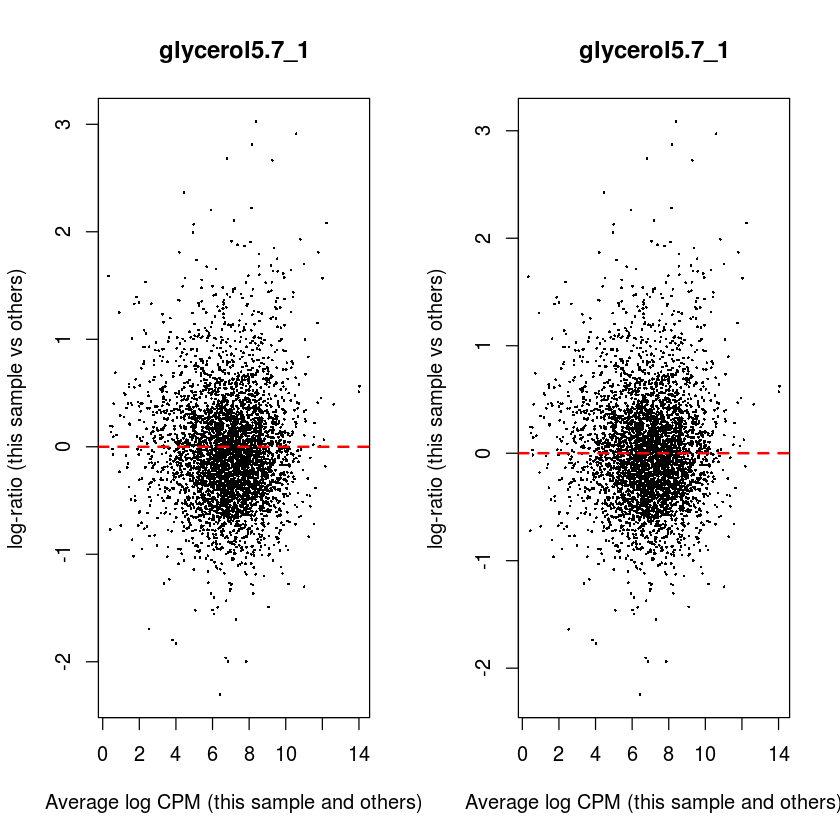

In [50]:
par(mfrow=c(1,2))

plotMD(x,column = 1) #before normalization
abline(h=0,col="red",lty=2,lwd=2)

plotMD(y,column = 1) #after normalization
abline(h=0,col="red",lty=2,lwd=2)

dev.off()

In [51]:
#Let's now explore difference between libraries. The idea is your four conditions should cluster distinctly.
#Biological replicates should indicate variability within a condition, if any.
#To explore this there are many options available - 
#Heirarchical clustering, MultiDimensional Scaling (MDS), Principal Component Analysis( PCA)

In [52]:
#Let's try Hierarchical clustering (HC) method. (Mouthful: unsupervised clustering!)
#We will be required to load the package ape() to carry HC.
#First let's calculate the cpm of all genes with changed library sizes and store it in a variable

In [53]:
library(ape)
y_matrix_cpm <- cpm(y)

In [54]:
#Next let's calculate the spearman correlation matrix within our 8 samples.
#Clearly, the correlation of glycerol5.7_1 with itself is 1. Why?

In [55]:
cor_matrix<-cor(y_matrix_cpm,method="spearman")
cor_matrix

,glycerol5.7_1,glycerol5.7_2,glycerol7_1,glycerol7_2,pyruvate5.7_1,pyruvate5.7_2,pyruvate7_1,pyruvate7_2
glycerol5.7_1,1.0000000,0.9967539,0.9152584,0.9113272,0.9506028,0.9535494,0.9085494,0.9194005
glycerol5.7_2,0.9967539,1.0000000,0.9123311,0.9137752,0.9518130,0.9525225,0.9118153,0.9197576
glycerol7_1,0.9152584,0.9123311,1.0000000,0.9934205,0.9420662,0.9470237,0.9740726,0.9903065
glycerol7_2,0.9113272,0.9137752,0.9934205,1.0000000,0.9458921,0.9448583,0.9834840,0.9913867
pyruvate5.7_1,0.9506028,0.9518130,0.9420662,0.9458921,1.0000000,0.9965817,0.9476595,0.9508592
pyruvate5.7_2,0.9535494,0.9525225,0.9470237,0.9448583,0.9965817,1.0000000,0.9430124,0.9517027
pyruvate7_1,0.9085494,0.9118153,0.9740726,0.9834840,0.9476595,0.9430124,1.0000000,0.9902916
pyruvate7_2,0.9194005,0.9197576,0.9903065,0.9913867,0.9508592,0.9517027,0.9902916,1.0000000


In [56]:
#For hierarchical clustering, we instead need an estimate of how different are these samples.
#This will help us cluster the samples in the form of a tree.

In [57]:
1-cor_matrix

,glycerol5.7_1,glycerol5.7_2,glycerol7_1,glycerol7_2,pyruvate5.7_1,pyruvate5.7_2,pyruvate7_1,pyruvate7_2
glycerol5.7_1,0.000000000,0.003246088,0.084741568,0.088672771,0.049397238,0.046450626,0.091450569,0.080599514
glycerol5.7_2,0.003246088,0.000000000,0.087668944,0.086224815,0.048186985,0.047477472,0.088184722,0.080242358
glycerol7_1,0.084741568,0.087668944,0.000000000,0.006579467,0.057933750,0.052976309,0.025927389,0.009693534
glycerol7_2,0.088672771,0.086224815,0.006579467,0.000000000,0.054107853,0.055141735,0.016516025,0.008613348
pyruvate5.7_1,0.049397238,0.048186985,0.057933750,0.054107853,0.000000000,0.003418301,0.052340466,0.049140763
pyruvate5.7_2,0.046450626,0.047477472,0.052976309,0.055141735,0.003418301,0.000000000,0.056987607,0.048297349
pyruvate7_1,0.091450569,0.088184722,0.025927389,0.016516025,0.052340466,0.056987607,0.000000000,0.009708387
pyruvate7_2,0.080599514,0.080242358,0.009693534,0.008613348,0.049140763,0.048297349,0.009708387,0.000000000


In [58]:
dist(1-cor_matrix) #calculates euclidean distance

              glycerol5.7_1 glycerol5.7_2 glycerol7_1 glycerol7_2 pyruvate5.7_1
glycerol5.7_2   0.006996330                                                    
glycerol7_1     0.194075238   0.193222491                                      
glycerol7_2     0.199036236   0.197746235 0.014600881                          
pyruvate5.7_1   0.114822843   0.113502913 0.128410918 0.130702722              
pyruvate5.7_2   0.112917169   0.111993608 0.128373475 0.131530051   0.008972619
pyruvate7_1     0.194298561   0.192580349 0.039189877 0.030646169   0.125337488
pyruvate7_2     0.194030843   0.192678608 0.025032818 0.019414061   0.122716134
              pyruvate5.7_2 pyruvate7_1
glycerol5.7_2                          
glycerol7_1                            
glycerol7_2                            
pyruvate5.7_1                          
pyruvate5.7_2                          
pyruvate7_1     0.127606134            
pyruvate7_2     0.123568239 0.027947829

In [59]:
hc<-hclust(dist(1-cor_matrix))

In [60]:
hc


Call:
hclust(d = dist(1 - cor_matrix))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 8 


In [61]:
#Let's plot a tree and visualize how our samples cluster. What do you interpret?

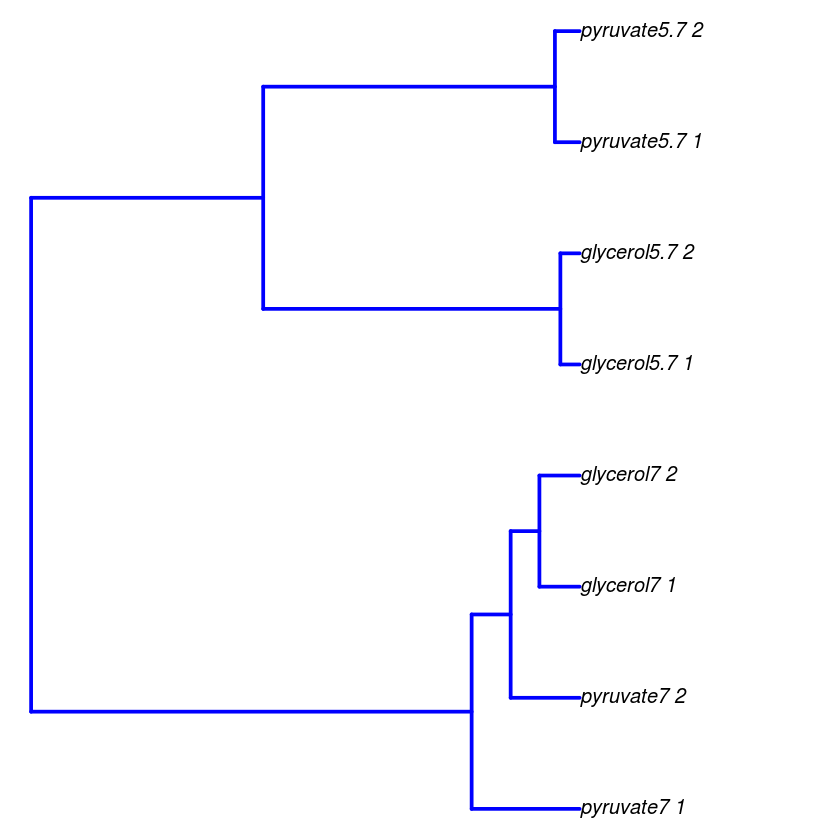

In [62]:
plot.phylo(as.phylo(hc), type="p", edge.col=4, edge.width=3, show.tip.label = TRUE, no.margin = TRUE)

In [63]:
#Another way of visualising is the MDS plot. (multidimensional scaling plot).
#Does the interpretation align with the hierarchical clustering interpretation?

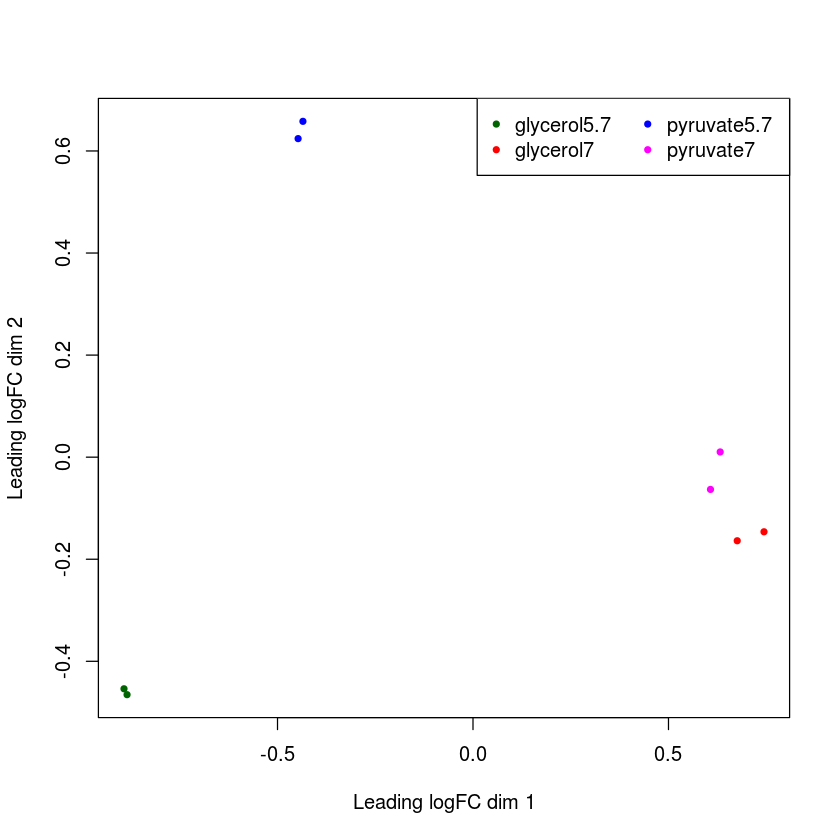

In [64]:
colors_mds = rep(c("darkgreen", "red", "blue", "magenta"), 2)
pch_mds = c(rep(20,8))
plotMDS(y,col = colors_mds[conditions],pch = pch_mds[conditions])
legend("topright", legend=levels(conditions), pch=pch_mds, col=colors_mds, ncol=2)

In [65]:
############################################# DISPERSION ESTIMATION ##############################################

In [66]:
#We will model the read counts (discrete data) for each gene per sample using negative binomial distribution.
#The dispersion parameter of the distribution helps us include the variability due to biological replicates
#in our model.

In [67]:
#Before calculating the dispersion, we will make a matrix. It is required for the downstream differential gene
#expression analysis.

In [68]:
design <- model.matrix(~0+conditions)
design

conditionsglycerol5.7,conditionsglycerol7,conditionspyruvate5.7,conditionspyruvate7
1,0,0,0
1,0,0,0
0,1,0,0
0,1,0,0
0,0,1,0
0,0,1,0
0,0,0,1
0,0,0,1


In [69]:
#Let's now calculate the dispersions for our genes across samples.
#The estimates for dispersion for each gene across samples could be affected by the outlier genes 
#which can have very large or small individual dispersions. Let's take care of that too.
#This will help us increase the power of the statistical test downstream.

In [70]:
y<-estimateDisp(y,design,robust=TRUE)

In [71]:
#Let's plot the biological coefficient of variation BCV = squareroot(Dispersion)
#Emperically it has been observed, the genes with low counts tend to have higher dispersions, in RNAseq studies.

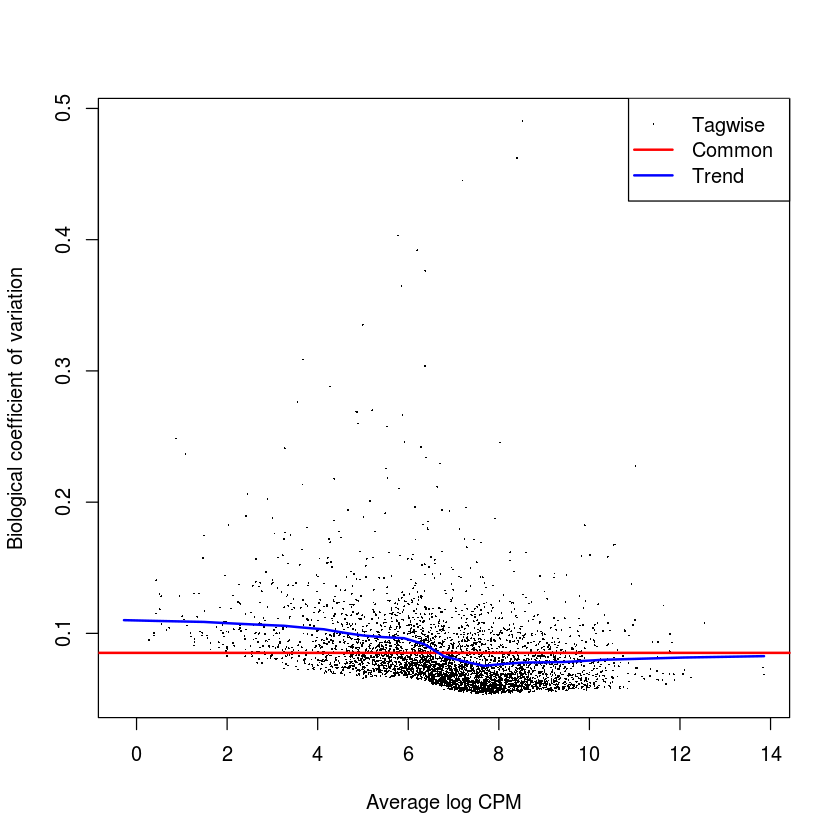

In [72]:
plotBCV(y)

In [73]:
#Let's now make our model more robust by including gene specific variability due to both biological and 
# technical sources. We will do this by extending our Negative binomial distribution model with quasi-likelihood
# method using the Generalized Linear Model(GLM)

#The negative binomial DISPERSION TREND obtained above (blue line) will be used by the quasi-likelihood method to 
#represent the OVERALL biological variablity across all genes.

#To capture the gene wise variability above and below the overall level (blue line) we will calculate 
# QL (quasi-likelihood) dispersions.

In [74]:
fit <- glmQLFit(y, design, robust=TRUE)

In [75]:
#Let's visualize our QL dispersions

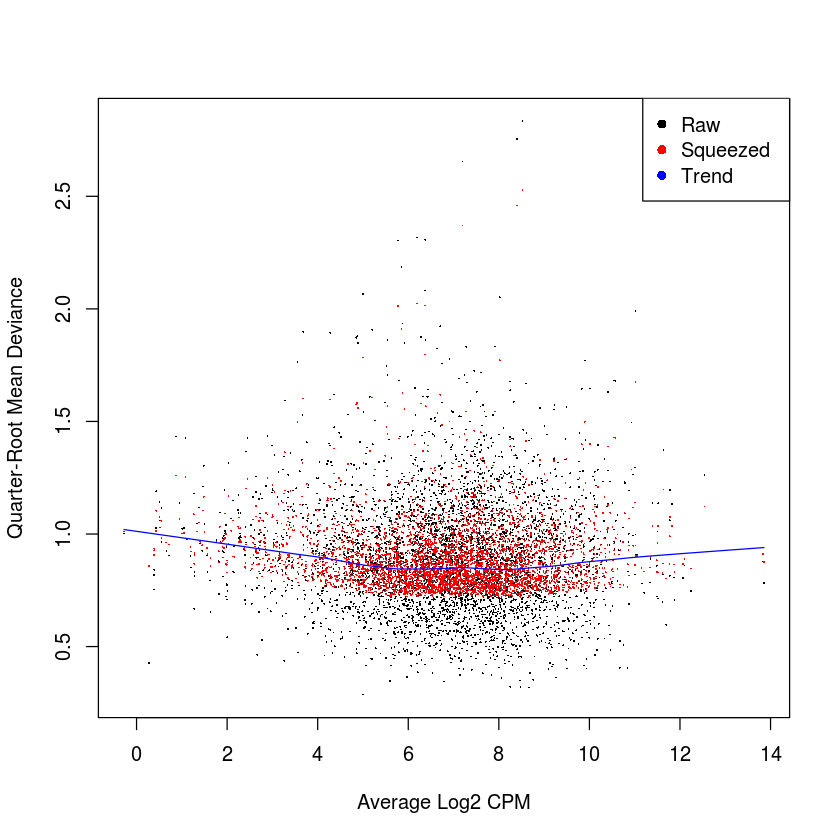

In [76]:
plotQLDisp(fit)

In [77]:
#Notice gene wise variability is being squeezed towards the trend line. Why is this important?
#Remember we do not have a large number of replicates per sample to calculate the variability per gene.
#We have to estimate the variability in the expression of each gene using the expression of similar genes.

#All we are doing above is reducing the uncertainity in these estimates.
#This is helpful in the subsequent analysis when we will be running statistical tests on each gene.
#To say if a gene is significantly different ( over-expressed or under-expressed) we will, in essence
# compare the variability of the mean expressions between two conditions (each condition having two biological replicates each in our case)

#A better estimate will reduce our chances of false negatives ( Type II error), thereby increasing the power of the statistical test.

#Food for thought: How much squeezing would you want for outlier genes versus main body of genes??
#Hint: This will help us to reduce the false positives (Type I error)

In [78]:
################################## DIFFERENTIAL GENE EXPRESSION ANALYSIS #########################################

In [79]:
#Let's try to compare DGE between two conditions: M. tb grown in glycerol at neutral (pH 7) and acidic (pH 5.7).
#edgeR provides a beautiful function called "makeContrasts()". It can help compare any combinations of conditions.
#Let's see how?

In [80]:
mvsw<-makeContrasts(conditionsglycerol5.7-conditionsglycerol7,levels=design)

In [81]:
#Remember the log-2-fold-changes will always be with respect to the first condition that you feed in.
#In our case, a log2-fold-change of 4 for gene X will indicate an upregulation of gene in glycerol 5.7 condition
#relative to glycerol 7 condition.

In [82]:
#Now that we have our conditions ( two conditions with two biological replicates each) in place.
#We also have the average expressions relative to the conditions for each gene along with the estimated variability.
#Let's now run a statistical test on each gene to see if their expressions are significantly different or not.

In [83]:
#Since we have used a GLM model to fit our expression values for all our genes, we are going to use 
# GLM QL F test. 

#The F test ensures a stricter error rate control.

In [84]:
res<-glmQLFTest(fit,contrast=mvsw)

In [85]:
head(res$table)

,logFC,logCPM,F,PValue
WP_003400253.1,-1.44422997,9.019441,210.5194905,3.377486e-07
WP_003400271.1,-0.76095761,8.638047,101.4175611,6.061030e-06
WP_003899768.1,-0.73984042,6.755377,35.8082419,2.822424e-04
WP_003899769.1,-0.30463200,5.960157,7.2851614,3.870571e-02
WP_003917863.1,0.15032634,9.928943,4.5962837,1.907513e-01
WP_003400286.1,0.04143015,9.887253,0.3379308,7.181801e-01


In [86]:
#Let's now run a multiple hypothesis testing on our per gene statistical test p-values.
#The idea is to reduce false positives i.e we want to control the false discovery rate (FDR)

#We will use the Benjamini-Hochberg (BH) method.

In [87]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
WP_003405622.1,5.005784,7.778947,1801.614,5.079639e-11,8.263150e-08
WP_003414276.1,-2.923188,8.978685,1726.331,6.062049e-11,8.263150e-08
WP_003420557.1,3.129346,8.241253,1596.074,8.388999e-11,8.263150e-08
WP_003406195.1,3.861457,8.258581,1575.748,8.846188e-11,8.263150e-08
WP_003420552.1,3.356236,7.991766,1522.324,1.020394e-10,8.263150e-08
WP_003899306.1,3.750672,12.100462,1299.255,1.965603e-10,1.326455e-07
WP_003404392.1,2.356242,7.943128,1137.921,3.400604e-10,1.596234e-07
WP_003406192.1,3.784070,10.859959,1128.164,3.523801e-10,1.596234e-07
WP_003898759.1,3.017265,9.621217,1126.292,3.548064e-10,1.596234e-07
WP_003898761.1,2.965751,9.250510,1090.278,4.057956e-10,1.643066e-07


In [88]:
#Let's explore how many genes do we get at an FDR of 5%. (default value)

In [89]:
is.de<-decideTestsDGE(res)
summary(is.de)

   [,1]
-1 1237
0  1632
1  1180

In [90]:
#After Multiple Hypothesis testing, that controls the False Positives, in our example there are 1237 significantly
# downregulated and 1180 upregulated genes in glycerol 5.7 condition. 

#Recall that we had filtered for genes with low read counts in the beginning. A higher number of genes would have
#reduced the significance to a considerable amount. By removing those genes we ensured that the false negatives
#don't increase.

In [91]:
#Let's now try and move towards biologically relevant gene expression differences.
#We now ask the question what are the number of genes which have a log2FC significantly greater than a desired
#threshold. Let's say we want to only consider genes which have fold change more than 1.5.
# Let's run a statistical test for this.

In [92]:
tr<-glmTreat(fit,contrast=mvsw,lfc=log2(1.5))
tr$table

,logFC,unshrunk.logFC,logCPM,PValue
WP_003400253.1,-1.44422997,-1.44425707,9.019441,2.006593e-06
WP_003400271.1,-0.76095761,-0.76097468,8.638047,5.262788e-03
WP_003899768.1,-0.73984042,-0.73990102,6.755377,1.691022e-02
WP_003899769.1,-0.30463200,-0.30467180,5.960157,4.819155e-01
WP_003917863.1,0.15032634,0.15032757,9.928943,7.429981e-01
WP_003400286.1,0.04143015,0.04143051,9.887253,9.299610e-01
WP_003400291.1,-0.17715475,-0.17716072,7.987324,6.972134e-01
WP_015626284.1,-0.71966325,-0.72036321,3.220356,5.530925e-02
WP_003400307.1,-0.80086142,-0.80096897,6.208123,2.310610e-02
WP_003400321.1,-1.15227071,-1.15228145,10.123580,1.644611e-06


In [93]:
#Let's calculate the FDR now.

In [94]:
topTags(tr)
tr$table

,logFC,unshrunk.logFC,logCPM,PValue,FDR
WP_003405622.1,5.005784,5.006959,7.778947,5.819332e-11,1.123429e-07
WP_003414276.1,-2.923188,-2.923275,8.978685,9.240003e-11,1.123429e-07
WP_003406195.1,3.861457,3.861757,8.258581,1.107194e-10,1.123429e-07
WP_003420557.1,3.129346,3.129539,8.241253,1.207253e-10,1.123429e-07
WP_003420552.1,3.356236,3.356408,7.991766,1.387292e-10,1.123429e-07
WP_003899306.1,3.750672,3.750685,12.100462,2.463357e-10,1.662356e-07
WP_003406192.1,3.784070,3.784110,10.859959,4.398823e-10,2.454207e-07
WP_003898759.1,3.017265,3.017332,9.621217,5.211055e-10,2.454207e-07
WP_003898975.1,3.855377,3.855535,8.331245,5.923398e-10,2.454207e-07
WP_003898761.1,2.965751,2.965831,9.250510,6.061268e-10,2.454207e-07


,logFC,unshrunk.logFC,logCPM,PValue
WP_003400253.1,-1.44422997,-1.44425707,9.019441,2.006593e-06
WP_003400271.1,-0.76095761,-0.76097468,8.638047,5.262788e-03
WP_003899768.1,-0.73984042,-0.73990102,6.755377,1.691022e-02
WP_003899769.1,-0.30463200,-0.30467180,5.960157,4.819155e-01
WP_003917863.1,0.15032634,0.15032757,9.928943,7.429981e-01
WP_003400286.1,0.04143015,0.04143051,9.887253,9.299610e-01
WP_003400291.1,-0.17715475,-0.17716072,7.987324,6.972134e-01
WP_015626284.1,-0.71966325,-0.72036321,3.220356,5.530925e-02
WP_003400307.1,-0.80086142,-0.80096897,6.208123,2.310610e-02
WP_003400321.1,-1.15227071,-1.15228145,10.123580,1.644611e-06


In [95]:
#Notice the difference in the FDR values before and after applying glmTreat() function for the gene
#"WP_003405622.1".

In [96]:
#Let's explore how many genes with a fold change greater or smaller than 1.5 do we get with and FDR of 5%.

In [97]:
is.de2<-decideTestsDGE(tr)
summary(is.de2)

   [,1]
-1  350
0  3164
1   535

In [98]:
#Do we see any differences in the genes from previous results?

In [99]:
######################################### DATA VISUALIZATION #####################################################

In [100]:
#Let's visualize our upregulated and downregulated genes using an MD plot (previously used in data exploration).

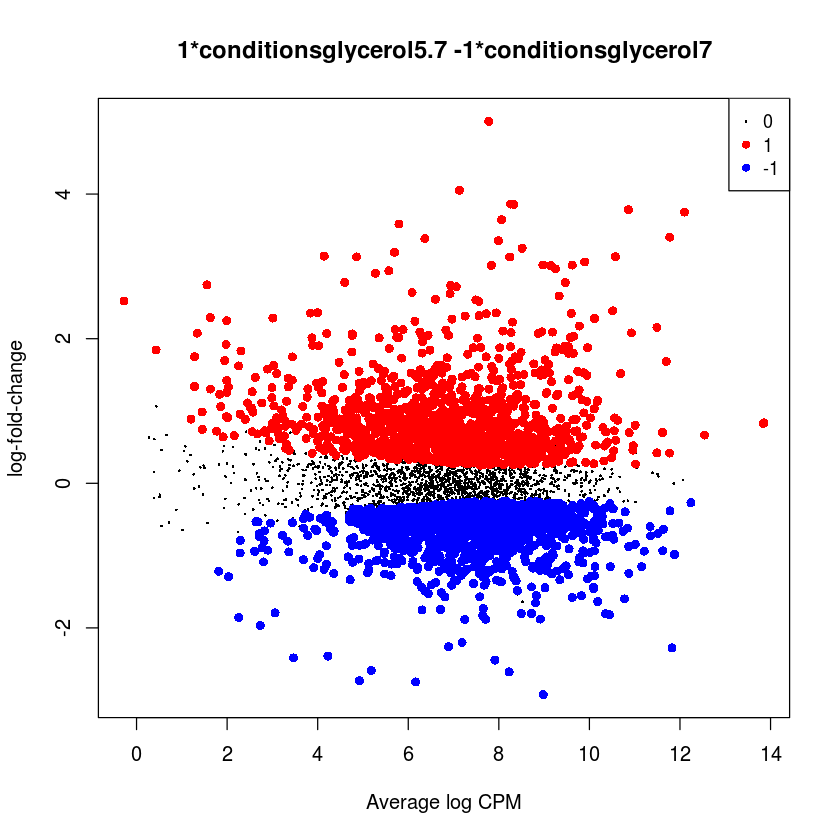

In [101]:
plotMD(res,status=is.de,values=c(1,-1),col=c("red","blue"),legend="topright") #Before glmTreat() function

In [102]:
#Remember the above plots is just to check the magnitude of upregulated and downregulated genes. It doesn't depict
#significantly expressed genes in the current plot.

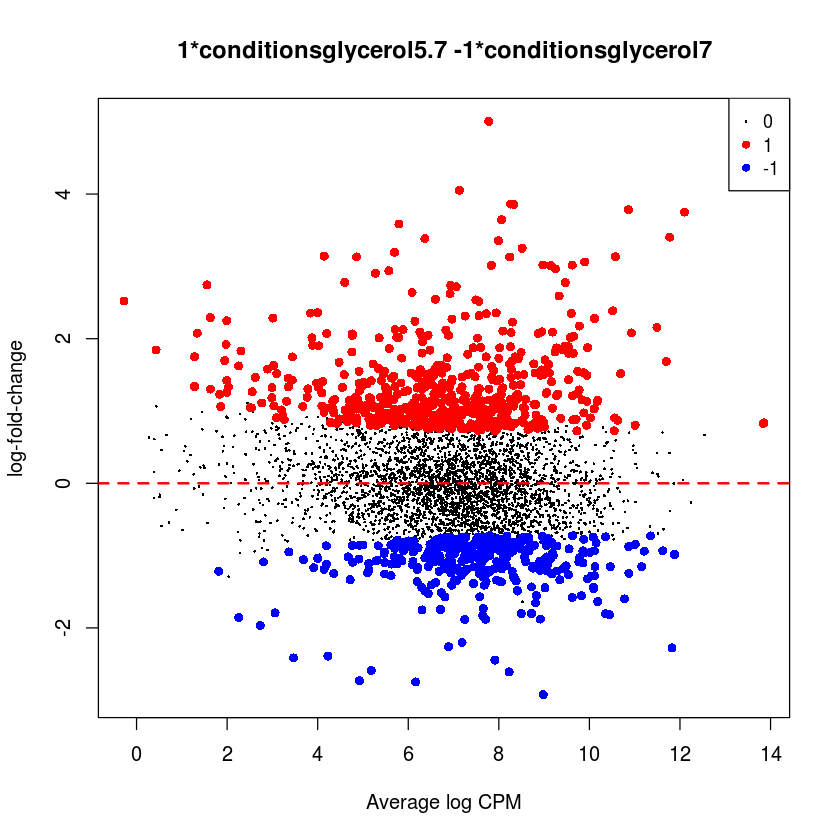

In [103]:
plotMD(tr,status=is.de2,values=c(1,-1),col=c("red","blue"),legend="topright") #After glmTreat()
abline(h=0,col="red",lty=2,lwd=2)

In [104]:
#The MD plot doesn't allow us to show significantly differentially expressed genes on the plot.
#Let's use Volcano plot that allows us to do exactly the same, make it more interesting to explore.


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



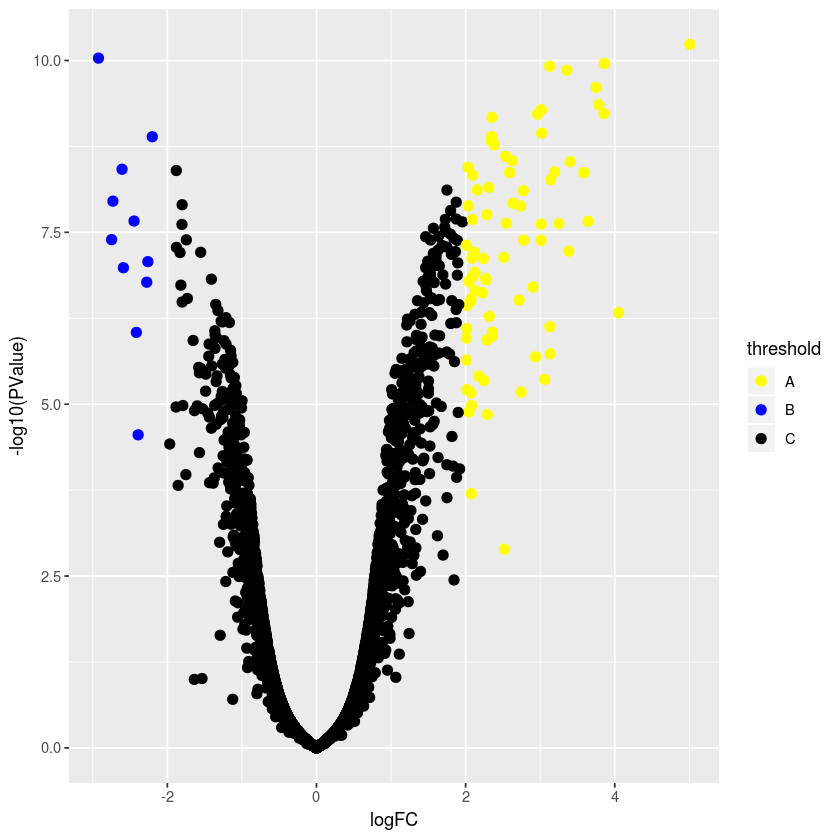

In [105]:
library(dplyr)
library(ggplot2)
tr_volplot<-tr$table%>%mutate(threshold = ifelse(logFC >= 2,"A", ifelse(logFC<=-2 , "B", "C")))
ggplot(tr_volplot, aes(x=logFC, y=-log10(PValue))) +
  geom_point(aes(colour = threshold), size=2.5) +
  scale_colour_manual(values = c("A"= "yellow", "B"="blue",  "C"= "black"))

In [106]:
#What do you interpret from the above Volcano plot?

In [107]:
#Last but not the least, let's try and look at the expression levels of genes across our different samples using
# a heatmap to get a holisitic picture of changes in expression levels across samples for a subset of genes.

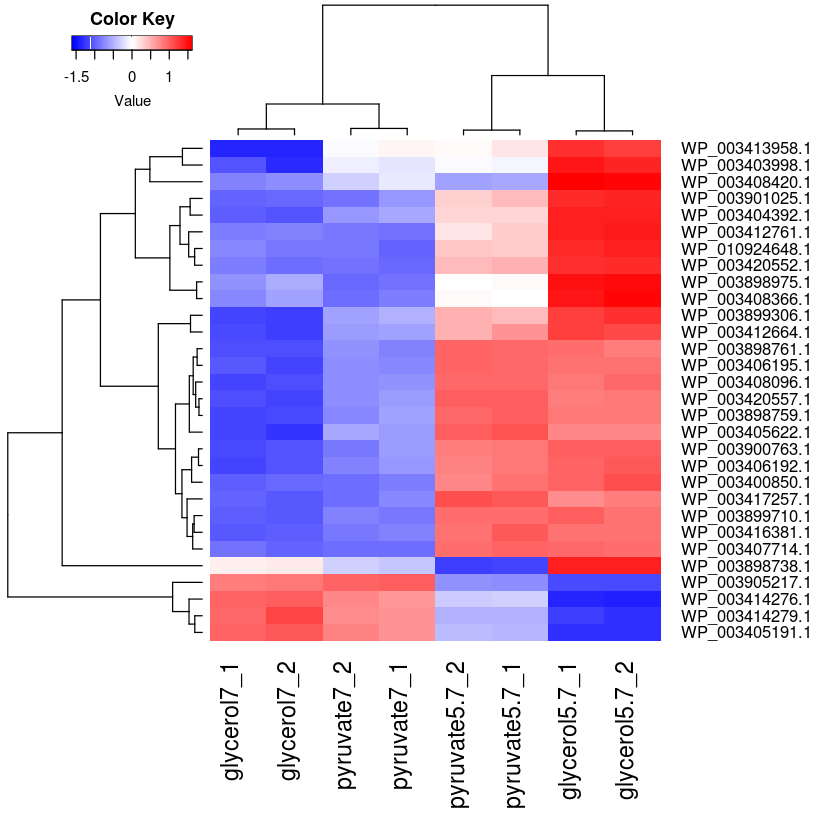

In [108]:
logCPM<-cpm(y,prior.count=2,log=TRUE) #Calculating logCPM for each gene across all samples
o<-order(tr$table$PValue) #sort all genes on the basis of P-value from the glmTreat() obtained matrix 
logCPM<-logCPM[o[1:30],] #We now select the top 30 genes.

logCPM<-t(scale(t(logCPM))) #We scale our logCPMs of each gene to mean zero and standard deviation 1. Why?

col.pan<-colorpanel(100,"blue","white","red")

heatmap.2(logCPM, col=col.pan, Rowv=TRUE, scale="none",
          trace="none", dendrogram="both", cexRow=1, cexCol=1.4, 
          density.info="none", margin=c(10,9), lhei=c(2,10), lwid=c(2,6))

In [109]:
#Do you notice anything different in the clustering pattern of the samples in the above heatmap?

In [110]:
#What other kind of differential gene expression questions can you ask from the above sample?

#For example, we could ask, if the change in expression between Mycobacterium tuberculosis growing with 
#pyruvate and glycerol as carbon source is same at an acidic pH as it is at a neutral pH.
#How would you make the contrasts for these?